# **Sentiment vs Stock: A Pre, During, and Post COVID Analysis of Company performance as function of Public Sentiment**

Joshua Andres Grajales 2024

Wesleyan Univeristy 

QAC 211 Fall 2021

Maryam Gooyabadi

## **Abstract**

With the pandemic slowly receeding, granting slow reversal of the COVID induced restrictions, a pre-pandemic world emerges. In particular this warrants public commerce to return to its in-person components putting in question the longevity of those corporate efforts taken during the quarantine period.  Will we see a drawback in public reliance on digitlized commerce, or did COVID highlight points of optimization for public shopping? To this end, this project studies the performnance of tech companies in the pre, during, and post COVID periods with the intention of gaining insight on the impact that such a novel event had on company performance. Specifically the study utilizes the twitter tweet text over these 3 periods as a proxy for public sentiment and compares it to the closing stock price of these companies in the respective period. We use a linear regression to model the dependence of the two varibles with the hopes of using the results to draw inferences on how public sentiment may shift as we stray farther from the quarantine.

## **Introduction**

Prior to the pandemic public spending habits concerned themsleves with "hitting the gym, grabbing a drink at the local pub, and hailing a cab" but as the unseen biological enemy spread across the country the vast majority withdrew indoors (Barua, 2021). This hiatus in public spending habits placed great tension on those industries that relied on in-person interactions such as: travel, transportation, and restaurant spending. After months of lockdown and social distancing, consumers were forced to change their spending habits shifitng their attention to digitlized forms of commerse. (Jpmorgan, 2021). Such a shift in consumer habits has speeded the adoption of digital technologies by several years (Mkinsey, 2020). Specifically based on the McKinsey Global Survery we see that companies have accelerated the digitization of their customer and supply-chain interaction by three to four years (Mkinsey, 2020). Moreover, this adoption and expansion of digitilized technologies in the corporate and consumer facing environments are expected to be permanent changes to companies business models. 

With an increase in public reliance on digilitzed resources we also see a shift in corporate investmest strategies. In fact, executives across many companies report that the impact of the crisis led them to increase funding towards digitial initiatives more than anything else - more than increase in costs, the number of people in technology roles, and the number of customers (McKinsey, 2020). The pandemic paves way for a novelty in the tech sector especially as we consider the means by which these companies adapted to such tumultuous times. Taking a closer look at the strategies adopted by these companies, in addition to the sentiment of the general public, sheds inight on the efficacy of these efforts. Thus, studying these COVID induced corporate repsonses, and weighing them in terms of public sentiment and stock price, can reveal business startegies that can be used for growth. With a deep understanding of these strategies, companies can optimize the performance of their digitilized products and environments. 


As we continue to move away from the pandemic period it is valubale to analyze the efforts taken by the tech industry as they experienced the greatest attention during the quarantine period. Specifically, techvendors such as Microsoft, Apple, Netlfix and Nvidia, to name a few, experienced great surge in their sales as a large part of the public were confined to their homes (Novicio, 2021). Others based more in social media, such as Istagram, Zoom, and Facebook, also faced increased user attention. 

This study aims to analyze the performance of these companies during the COVID time period to gauge the efficacy of corporate response to such extreme shifts in consumer demands from digitlized spheres. To do this we consider techvendors and social media giants - for the sole reason that they are best suited with their resoruces to enact change - and the general sentiment the public shared towards the companies prior, during, and after the pandemic period.  

## **Methods**

### 1. Twitter Developer Status
The study begins with settting up a twitter account that has developer status. In order to do this we apply for an elevated twitter account that warrants us access to twitter's *search full archive* function. With this we are able to search for tweets over a broad time range, dating back to the first tweet on the twitter app. To apply for a twitter developer status refer to the following link: https://developer.twitter.com/en/portal/dashboard .
Once the account is approved make an app through our dashboard and aquire the necessary credentials to establish our token (i.e our unique identifier as we make tweet requests). 

### 2. Data Extraction 
We begin the data extraction by setting up our twitter developer account and taking special note of our *API Key and Secret Key* in addition to the authentication tokens associated with our app. Once we have done this we load our credentials into a twitter token and begin to make tweet requests using the *search_fullarchive* function from the tweetr library. When making the tweet requests we specify the number of tweets we desire, the regular expression (i.e the string pattern we want to filter tweets by) associated with the query, and the date range we want to search for tweets in. Below is an example one of the calls we made using the *search_fullarchive* function: 

    - query = "(Samsung) lang:en"
    - stdate = "202009010000"
    - endate = "202009280000"
    - saveas = "sam2.csv"

    - path = "/Users/joshuagrajales/Desktop/qac211/project/techvendors/samsung/"

    - d = search_fullarchive(q = query, n=200, fromDate = stdate, toDate = endate, token = twitter_token, parse = TRUE, env_name = "qac211proj")

    - text_data = as.data.frame(d$text)

    - abs_path = paste(path,saveas, sep='')

    - write.csv(text_data, abs_path, row.names = FALSE)


The above indicates that we are searching for 200 tweets in english with reference to the word "Samsung" during the time period of October 1, 2019 to October 28, 2019. The search query returns a large data frame with dozens of variables but for the purpose of this study we only requrire the text. We then isolate the text column and save it as a CSV file. 

We repeat this process 3 times for each company, one for each time period. 
### 3. Analysis 
Once we aquired all of the CSV data we perform the analysis in python using re to clean the text, Textblob to assign sentiment scores to the tweets, WordCloud to produce word maps, matplotlib to produce bar charts counting the number of positive, neutral, and negative tweets associated with each time period.

Despite R's ability to carry out similar functionality, we chose to do the analysis in python due to it's growing use in large technology companies; peforming the analysis in python alligned more with demands from industry.  

Associated with each python file you will see a description of the varibales. We provide a brief overview of the functions and the directories below: 

- allsent.py → contains all the sentiment analysis plots for the companies included in the study 

- sentimentAna.py → uses the two below functions to perform sentiment analysis 

- cleanTxt.py → cleaning the Twitter texts acquired using tweetr

- sentfunc.py → get the polarity, subjectivity, and positivity, neutral, and negativity counts 

- Regression.py → performs regression analysis given 3 csvs and 3 corresponding periods

- mergestock_tweet.py → takes a single csv with Twitter text and yahoo url to merge the two sets of data
    - Also dependent on sentfunc.py and cleantTxt.py


- Spotlight → plots the stock vs time and sentiment vs time to give a sense of chronology; used for by-eye analysis of sentiment and stock over time (only for apple and zoom)

- Regression → all of the regressions for companies in the study 

- SM_comm and techvendors → csv data containing text from tweetr for each company also gives 
csvs with text merged with corresponding closing stock price (acquired from yahoo finance)

    - <filename 1> : October 1 2019 - October 28 2019
    - <filename 2> : October 1 2019 - October 29 2020
    - <filename 3> : December 1 2021 - December 31 2021

- Tweetr_data → data collected for each company using tweetr search_fullarchive function


Extra:
tweetpysentA → sentiment analysis was performed using python’s tweepy
Can be useful for future class presentations of Wordcloud functionality; extracts tweets no older than a week 

The time period selected are meant to represent pre(1), during(2), and post(3), COVID time periods. Specifically the first two time periods were selected during the fall season as they coincide with the release of new products from companies in the study. Expecting this to be the time of peak commerce, and thus peak public dialogue, we aim to capture the impact of COVID on the sentiment of consumers. The last time period distinguishes itself from the first two because it was not until December of 2021 that we began to see greater lift of COVID induced restrictions. Though this statement lies in contradiction to omicron cases, this was the most optimal period to conduct the study while limiting the possibility of consumer withdrawl from public commerce. 

#### 3.1 Sentiment Analysis 

Using re we clean the texts ridding of any syntactical jargon that comes with tweets such as urls, @ symbols, and retweets. We then parse all of the tweets through Textblob's *polarity* and *subjectivity* functions. The polarity yields an real number between -1.0 and 1.0, where the the more positive the number demarcates the extent of its positivity; if the score is 0 then the tweet is deemed neutral. The subjectivity allows us to gauge the efficacy of the library itself as it indicates how subjective the interpreation of the expression was when parced through Textblob's sentiment algorithm. 

As each tweet was assigned a polarity and subjectivity score we were able to make scatter plots of the tweets for each company in addition to word clouds (i.e graphs displaying words frequently captured in the tweets associated with the query for the company) and bar charts for each time period. 

#### 3.2 Regression

We aquire closing stock prices from Yahoo finance historical data associated with each company. Using this we create dataframes of text and stock price for each respective time period. In doing this we assume that the texts aquired from the tweetr query are returned in chronological order by day. We then merge the dataframes of all 3 time periods into one and perform our linear regression. 

#### 3.2 Spotlights

We perform a by-eye analysis of the stock price and sentiment over time to determine if there is correlation between the two. Despite a time-series analysis is best suited for this, our resouces impeded us from doing so. 

Due to the naiveness of this approach we only conduct this analysis on two companies: Apple and Zoom. We inspect the stock price and sentiment over the 2020 and 2021 time periods (i.e during periods of peak and minimum COVID cases respectively). 








## Results

We obtained significant results for the slope of all models except those of Facebook, Instagram, and Microsoft. Focusing on Facebook and Instagram, taking into consideration that both applications reside under the same stock ticker, FB Inc. we note that reasons for the insignficance of the model may be due to the impact of significant events on (unique to the company) and its implications on its public perception. Specifically, we make reference to the Cambridge Analytica partnership largely covered in the media around the 2020 elections (Wong, 2019). We postulate that despite the damaging impacts of this event, there is the possbility that negative tweets were being published while tangible, hand-held products, such as the Oculus (a VR system of FB Inc.) were left unaffected. Given these conditions, the multi-facedness of FB Inc. can serve as a smokescreen from being domainated from negative events stemming from aspect of the company. In other words, depsite the negativity routed in adminstrative decisions, there may still be a great volume of positive tweets associated with other domains of FB Inc. We note that these statements are speculative and requires a more detailed study to fully understand the complexity of interactions of FB Inc. various consumer services.

With regards to Microsoft, we believe the slope was poorly modeled due to the variability in sentiment that arose from the console wars with Samsung. As stated by Kain from *Forbes Magazine* , Samsung's Play Station 5 won the bi-decade console war - this illiciting an upheaval in the public discourse of the gaming community (Kain, 2021). For this reason we expect the tweets gathered to be representative of both loyal Microsoft consumers and those who oppose them. 

Though we obtain significant results for the slope of all other models, we note other model paramaters such as adjusted r-squared and AIC yield concerning results. Reasons for such likely stem from the technical insufficiency of a linear regression to model these variables. For better results, future studies should rely on time-series analysis. 

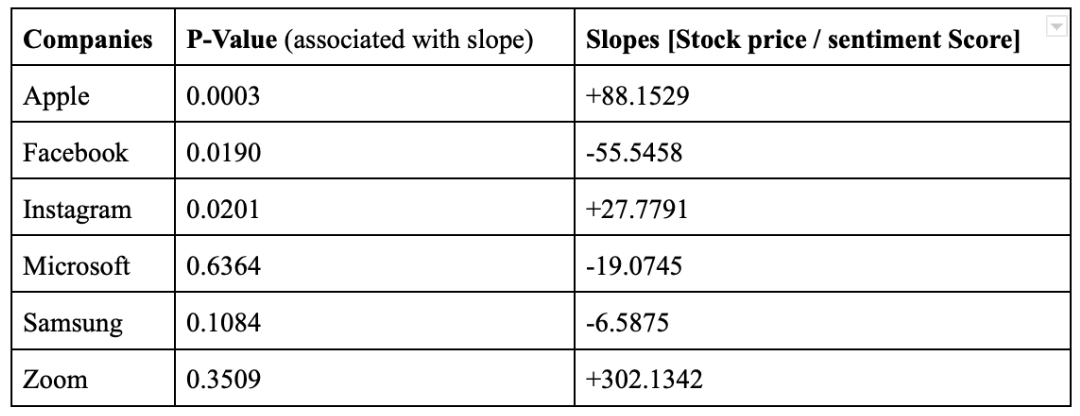

In [4]:
from PIL import Image
img = Image.open("/Users/joshuagrajales/Desktop/table.png")
img

## Discussion 

### 1. Improvements and Limitations

#### 1.1 Twitter API 

The study was largely limited by the lack of resources for using the Twitter API. The Twitter documentation lacked reference on how to use its features in frequently used data analysis languages (such as R and Python) forcing us to refer to forums and external tutorials. Even for those forums and other twitter scrapping libraries available, most have been left unmaintained for at least a years time; for those libraries that were still functional their resources were unable to access tweets from older periods. 

In the event that the Twitter API was better documented a larger sample of tweets could be covered per time period to yield increase accuracy in the sentiment scores assigned to a company in a given period. Moreover, access to more tweets would allow for a larger longitudinal study yielding better insight on trends over an extended time period. 

#### 1.2 Accuracy of Text Analysis

Many text analysis library function such that they have a dictionary of words that have been categorized according to their postivity, negativity, and neutrality. The main issues with this classification scheme is that they do not accurately account for the lingusitic nuance that comes from various social contexts and cultural values. The text library's inability to account for this affects the objectivity of the text analysis plausibly leading to inaccurate results. For improvement in text analysis techniques classification of words should implement machine learning techniques that can account for linguistic nuance. 

#### 1.3 Specificity of Queires

If we consider the word maps associated with our companies we see that some words are not associated with the company. Specifically, if we consider the word map for Apple we see the appearance of "Market" as a frequently associated word. This implies that the word Apple was associated with not only the company but also the food. An increased understanding of jargon associated with these companies can lead to a more representative sample of tweets. 


## Conclusion 

In conclusion, we found that all companies except Facebook, Instagram, and Microsoft yielded a statistically significant relationship between stock price and public sentiment. Future studies should consider implementing a time series analysis on a larger sample of technology-based companies, over a larger period of time and with a larger sample of tweets. Performing the study with these improvements will aid our understanding of how company performance was affected by the pandemic and whether these effects are long lasting. 